In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import dlib



In [6]:
!git clone https://github.com/madhavc9/headphone_dataset_proctorly

Cloning into 'headphone_dataset_proctorly'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (250/250), done.
remote: Total 254 (delta 4), reused 254 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (254/254), 25.50 MiB | 11.27 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [8]:
import os

main_dir = "/content/headphone_dataset_proctorly"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "Train")
test_dir = os.path.join(main_dir, "Test")

#SETING DIRECTORY FOR HEADPHONES AND WITHOUT HEADPHONES IMAGES DIRECTORY
train_head_dir = os.path.join(train_dir, "With_Headphones")
train_normal_dir = os.path.join(train_dir, "Without_Headphones")

test_head_dir = os.path.join(test_dir, "With_Headphones")
test_normal_dir = os.path.join(test_dir, "Without_Headphones")

In [9]:
train_head_names = os.listdir(train_head_dir)
train_normal_names = os.listdir(train_normal_dir)

test_head_names = os.listdir(test_head_dir)
test_normal_names = os.listdir(test_normal_dir)

['/content/headphone_dataset_proctorly/Train/With_Headphones/sony-mdr-1000x-headphone-review-2016-19.jpg', '/content/headphone_dataset_proctorly/Train/With_Headphones/images.jpg', '/content/headphone_dataset_proctorly/Train/With_Headphones/jpg.jpg', '/content/headphone_dataset_proctorly/Train/With_Headphones/0637c9b8dd35d9d5a194860619a36a5f.jpg', '/content/headphone_dataset_proctorly/Train/With_Headphones/portrait-of-smiling-doctor-in-headset-consulting-patient-online-picture-id1224215551.jpeg', '/content/headphone_dataset_proctorly/Train/With_Headphones/images (1).jpg', '/content/headphone_dataset_proctorly/Train/With_Headphones/istockphoto-916859206-1024x1024.jpg', '/content/headphone_dataset_proctorly/Train/With_Headphones/1-2.jpg']
['/content/headphone_dataset_proctorly/Train/Without_Headphones/1 (6937).jpg', '/content/headphone_dataset_proctorly/Train/Without_Headphones/rohit-m.jpg', '/content/headphone_dataset_proctorly/Train/Without_Headphones/1 (6939).jpg', '/content/headphone_

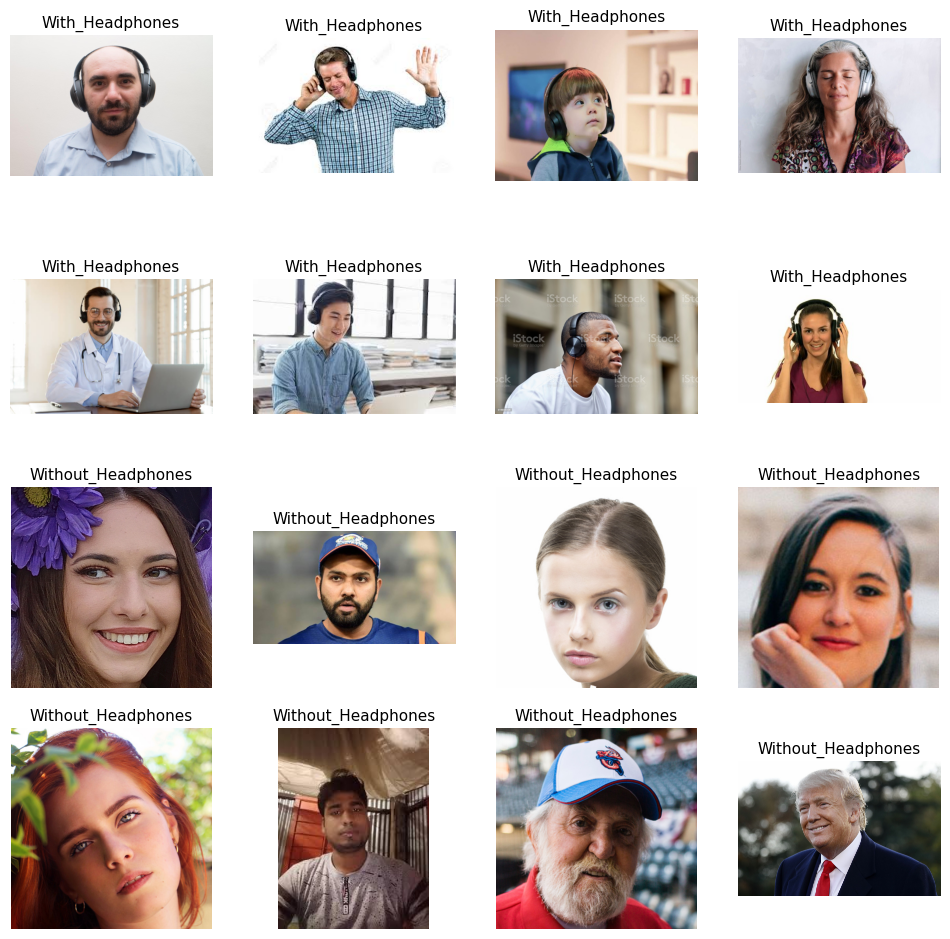

In [10]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

head_img = [os.path.join(train_head_dir, filename) for filename in train_head_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(head_img)
print(normal_img)

merged_img = head_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[4]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

In [11]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.1,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150),
                                                      subset = "validation",
                                                      batch_size = 32,
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150),
                                               batch_size = 32,
                                               class_mode = "binary")




Found 181 images belonging to 2 classes.
Found 19 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [12]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'With_Headphones': 0, 'Without_Headphones': 1}
Image shape is :  (150, 150, 3)


In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,429,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,483,905 (85.77 MB)

 Trainable params: 22,483,905 (85.77 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
# TRAINING THE MODEL
history = model.fit(train_generator,
                    epochs = 35,
                    validation_data = validation_generator)

Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4850 - loss: 6.4474 - val_accuracy: 0.4737 - val_loss: 0.6848
Epoch 2/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.5073 - loss: 0.7102 - val_accuracy: 0.4211 - val_loss: 0.6933
Epoch 3/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.5390 - loss: 0.6949 - val_accuracy: 0.5789 - val_loss: 0.6931
Epoch 4/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.6155 - loss: 0.6839 - val_accuracy: 0.5789 - val_loss: 0.6921
Epoch 5/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5682 - loss: 0.6787 - val_accuracy: 0.5789 - val_loss: 0.6699
Epoch 6/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.6386 - loss: 0.6640 - val_accuracy: 0.5263 - val_loss: 0.6887
Epoch 7/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.6457 - loss: 0.6321 - val_accuracy: 0.9474 - val_loss: 0.5528
Epoch 8/35
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.6354 - loss: 0.5803 - val_accuracy: 0.5789 - val_loss: 0.6475
Epoch 9/35

Text(0.5, 0, 'epoch')

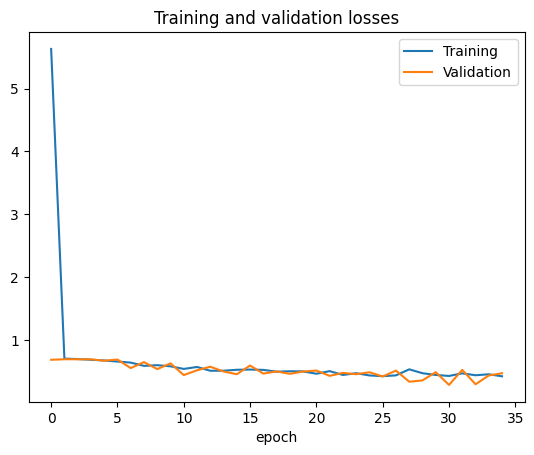

In [16]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

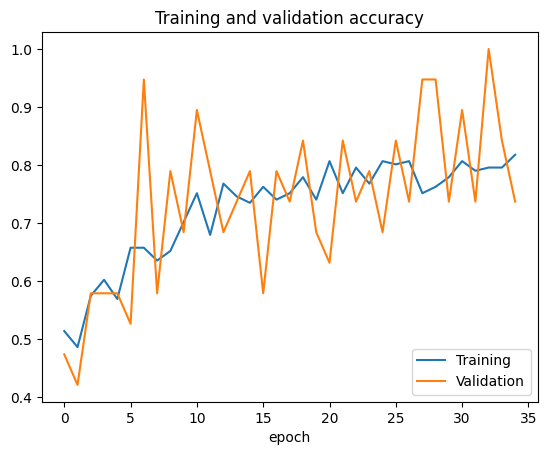

In [17]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [18]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7742 - loss: 0.4386
Test Set Loss :  0.43860867619514465
Test Set Accuracy :  0.774193525314331


In [19]:
model.save("Pretrained_model.h5")

In [22]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)

  if prediction == 0:
    print("HEADPHONES DETECTED")
  else:
    print("NO HEADPHONES DETECTED")

Saving Photo on 10-11-24 at 23.53.jpg to Photo on 10-11-24 at 23.53.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
NO HEADPHONES DETECTED


<IPython.core.display.Javascript object>

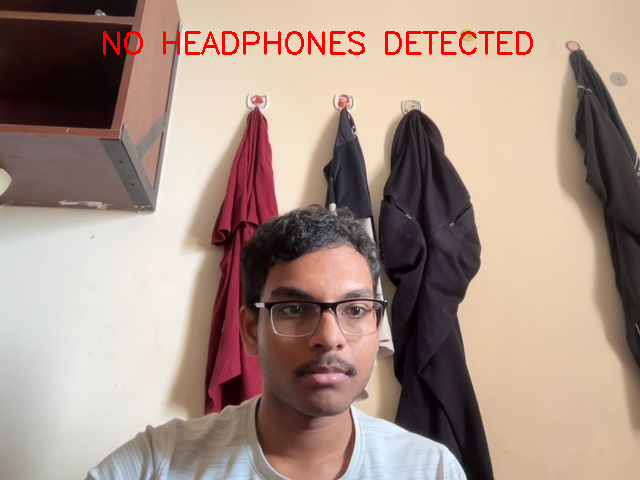

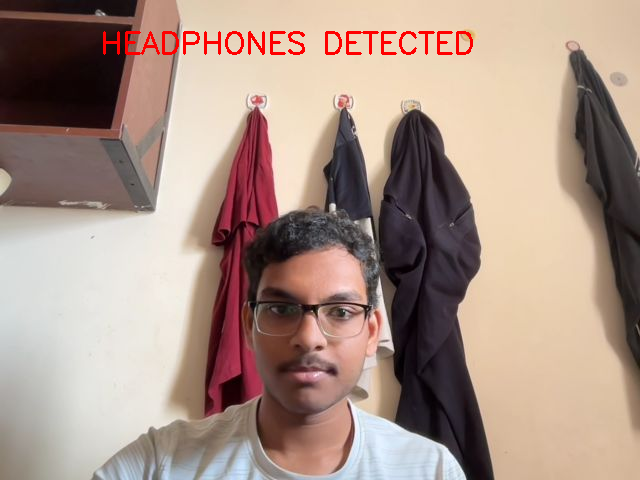

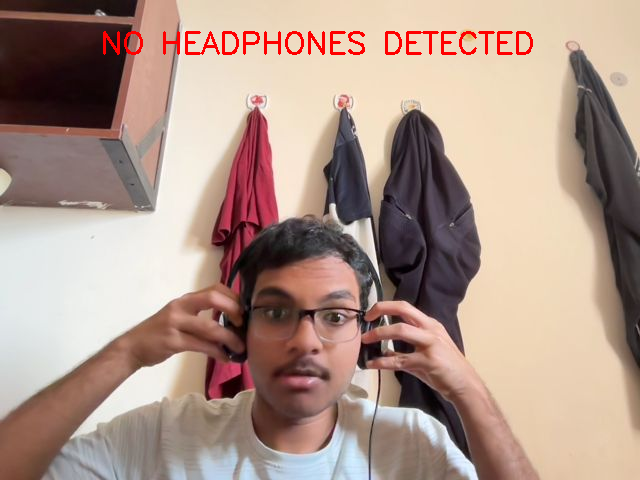

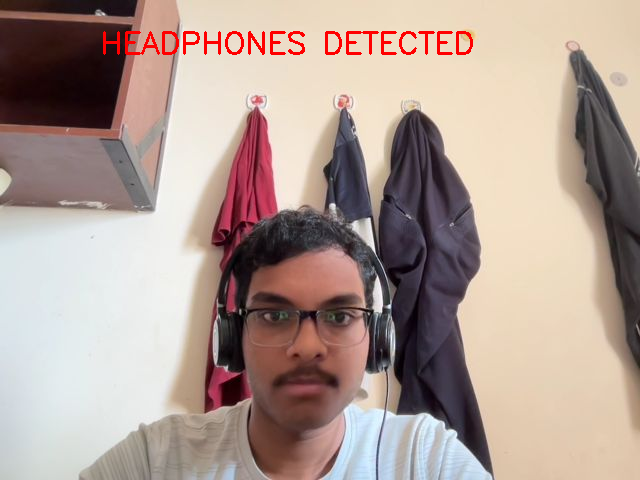

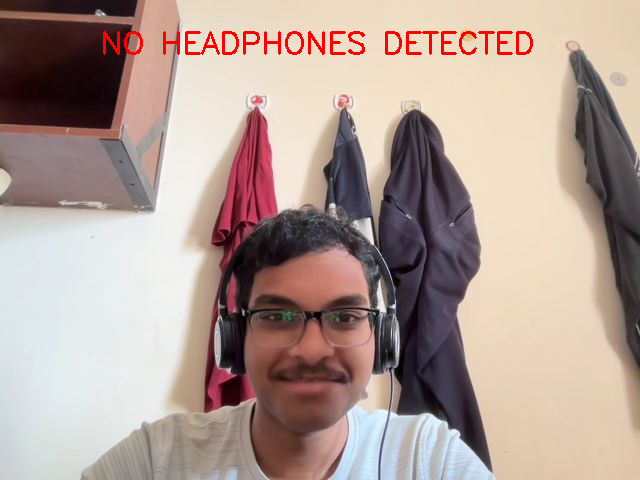

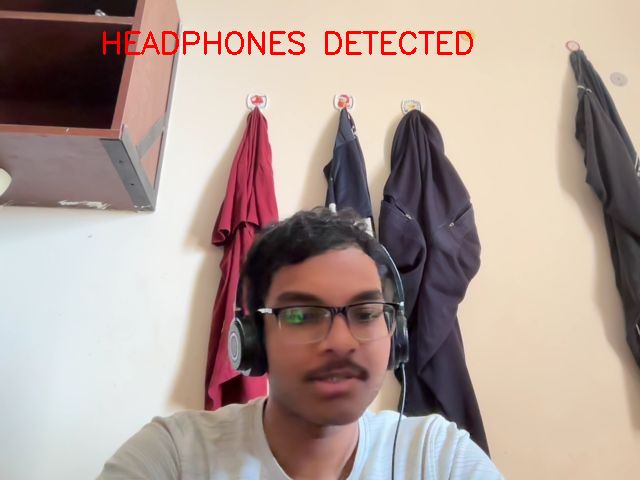

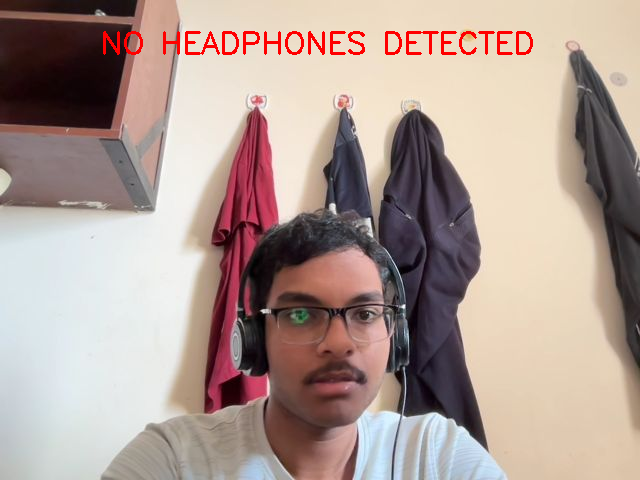

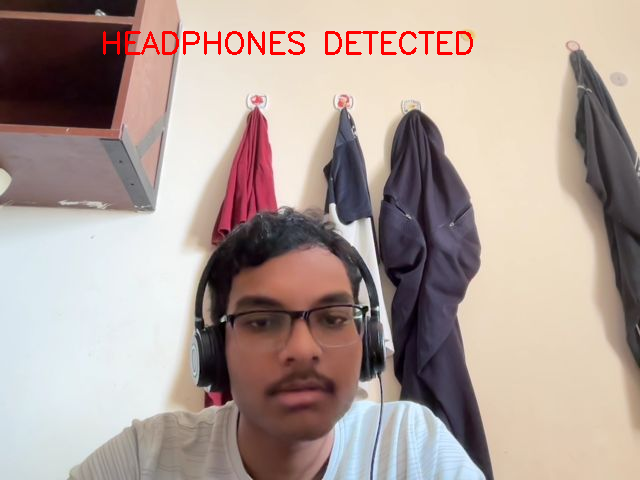

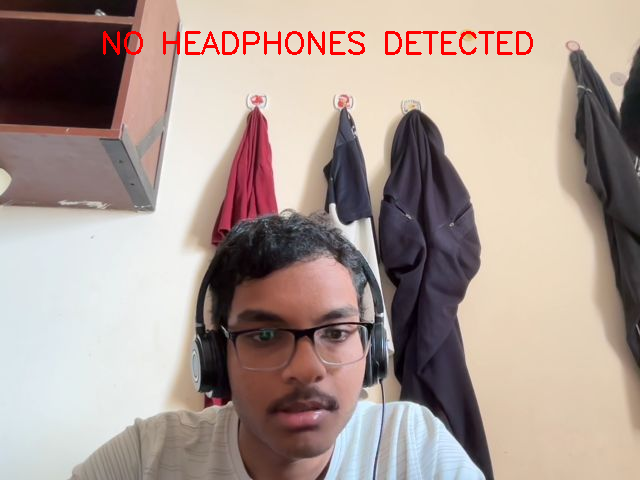

SyntaxError: 'break' outside loop (<ipython-input-23-aedb3dbc4ff9>, line 217)

In [23]:

from google.colab import files
from keras.preprocessing import image

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data






def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

cap = cv2.VideoCapture(0)
video_stream()

label_html = "Detecting ..."
bbox = ''
count = 0
detector = dlib.get_frontal_face_detector()

i = 0

while i>=0:

  js_reply = video_frame(label_html, bbox)
  if not js_reply:
      break


  frame = js_to_image(js_reply["img"])

  gray1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  cv2.imwrite('temp.jpg', gray1)
  img = cv2.imread('temp.jpg')

  # Convert into grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Load the cascade
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

  # Detect faces
  faces = face_cascade.detectMultiScale(gray, 1.1, 4)

  # Draw rectangle around the faces and crop the faces
  for (x, y, w, h) in faces:
	  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
	  faces = img[y:y + h, x:x + w]

	  cv2.imwrite('face.jpg', faces)





  if i%2!=0:
    cv2.putText(frame, "HEADPHONES DETECTED", (100, 53), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),
						2)
  else:
    cv2.putText(frame, "NO HEADPHONES DETECTED", (100, 53), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),
						2)




  cv2_imshow(frame)
  i+=1

if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()
